In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
#summary0 = pd.read_csv("/Users/erik/Projects/homework/atus-analysis/atusdata/atusact_2013.dat")
#summary1 = pd.read_csv("/Users/erik/Projects/homework/atus-analysis/atusdata/atuscps_2013.dat")
#summary2 = pd.read_csv("/Users/erik/Projects/homework/atus-analysis/atusdata/atusresp_2013.dat")
#summary3 = pd.read_csv("/Users/erik/Projects/homework/atus-analysis/atusdata/atusrost_2013.dat")
#summary4 = pd.read_csv("/Users/erik/Projects/homework/atus-analysis/atusdata/atusrostec_2013.dat")
summary = pd.read_csv("atusdata/atussum_2013.dat")
#summary6 = pd.read_csv("/Users/erik/Projects/homework/atus-analysis/atusdata/atuswho_2013.dat")

##Column Values:


* TUFINLWGT - statistical weight of respondent
* TRYHHCHILD - age of youngest child in household
* TEAGE - age of respondent
* TESEX - sex of respondent
* PEEDUCA - Educational Attainment
* PTDTRACE - Race
* PEHSPNON - Hispanic or else
* GTMETSTA - Metropolitan Status
* TELFS - working status of respondent
* TEMJOT - multiple job status
* TRDPFTPT - full time or part time status
* TESCHENR - school enrollment
* TESCHLVL - school level
* TRSPPRES - presence of spouse
* TESPEMPNOT - spouses employment status
* TRERNWA - weekly earnings
* TRCHILDNUM - number of children in household
* TRSPFTPT - spouses fulltime or parttime employment status
* TEHRUSLT - usual weekly hours of work
* TUDIARYDAY - Day of week
* TRHOLIDAY - Holiday
* TRTEC - Time spent providing elderly care
* TRTHH - Total time spent providing secondary childcare

In [8]:
summary.columns[0:25]


Index(['tucaseid', 'TUFINLWGT', 'TRYHHCHILD', 'TEAGE', 'TESEX', 'PEEDUCA',
       'PTDTRACE', 'PEHSPNON', 'GTMETSTA', 'TELFS', 'TEMJOT', 'TRDPFTPT',
       'TESCHENR', 'TESCHLVL', 'TRSPPRES', 'TESPEMPNOT', 'TRERNWA',
       'TRCHILDNUM', 'TRSPFTPT', 'TEHRUSLT', 'TUDIARYDAY', 'TRHOLIDAY',
       'TRTEC', 'TRTHH', 't010101'],
      dtype='object')

In [9]:
summary_ls = summary.set_index('tucaseid')

data = summary_ls.drop(summary_ls.columns[23:414], axis=1)

In [10]:
data

,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,...,TRSPPRES,TESPEMPNOT,TRERNWA,TRCHILDNUM,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH
tucaseid,,,,,,,,,,,,,,,,,,,,,
20130101130004,11899905.662034,12,22,2,40,8,2,1,5,-1,...,3,-1,-1,3,-1,-1,1,0,-1,365
20130101130112,4447638.009513,1,39,1,43,1,2,1,1,2,...,1,1,173076,1,2,40,1,0,-1,296
20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,-1,...,1,1,-1,0,3,-1,2,0,-1,0
20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,2,...,3,-1,86538,0,-1,-4,3,0,-1,0
20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,1,...,3,-1,23000,0,-1,21,2,0,-1,0
20130101130619,2372791.046351,-1,80,2,38,1,2,1,5,-1,...,3,-1,-1,0,-1,-1,1,0,-1,0
20130101130658,5671341.270490,-1,72,1,42,1,1,1,5,-1,...,3,-1,-1,0,-1,-1,5,0,-1,0
20130101130670,8608413.296903,-1,55,2,38,4,2,1,1,2,...,1,1,-1,0,2,9,1,0,-1,0
20130101130734,1378191.194810,-1,57,2,34,2,2,1,1,2,...,3,-1,40000,0,-1,30,1,0,-1,0


In [11]:
data_by_race = data.groupby('PTDTRACE')
for race, group in data_by_race:
    print(race)
    print(group['TRCHILDNUM'].value_counts())
    print(len(group['TRCHILDNUM']))

1
0     5037
1     1635
2     1536
3      548
4      178
5       27
6       10
7        4
10       1
9        1
dtype: int64
8977
2
0    1158
1     267
2     164
3      76
4      30
5       9
7       7
6       4
dtype: int64
1715
3
0    49
1    21
3    12
2    12
4     5
5     1
dtype: int64
100
4
0    155
2    118
1    110
3     32
4      8
9      1
5      1
dtype: int64
425
5
0    10
2     4
1     3
4     2
6     1
3     1
dtype: int64
21
6
1    10
0     8
3     4
2     4
5     1
4     1
dtype: int64
28
7
0    48
1    12
2     9
3     4
4     1
dtype: int64
74
8
0    6
1    4
2    3
3    2
dtype: int64
15
9
2    2
3    1
1    1
dtype: int64
4
10
0    4
2    3
1    3
3    1
dtype: int64
11
11
2    2
1    1
0    1
dtype: int64
4
12
2    1
dtype: int64
1
15
0    1
dtype: int64
1
16
1    2
0    2
3    1
dtype: int64
5
19
2    1
dtype: int64
1
21
0    2
1    1
dtype: int64
3


# Key

* Blue is White
* Green is African American
* Turquoise is Asian 

TRCHILDNUM
PTDTRACE TESEX            
1        1        0.785905
         2        0.837310
2        1        0.490964
         2        0.699334
3        1        0.826087
         2        1.259259
4        1        1.166667
         2        1.134694
5        1        1.333333
         2        1.333333
6        1        1.500000
         2        1.285714
7        1        0.419355
         2        0.767442
8        1        0.666667
         2        1.666667
9        1        2.500000
         2        1.500000
10       1        0.666667
         2        1.250000
11       1        2.000000
         2        1.000000
12       1        2.000000
15       2        0.000000
16       1        0.500000
         2        1.333333
19       2        2.000000
21       1        0.500000
         2        0.000000

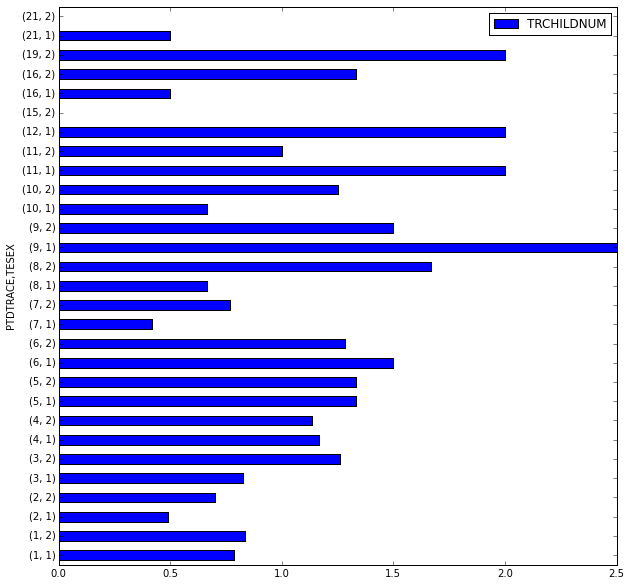

In [25]:
new_table = data.pivot_table(index=["PTDTRACE", "TESEX"], values=["TRCHILDNUM"])
new_table.plot(kind="barh", figsize=(10, 10))
new_table

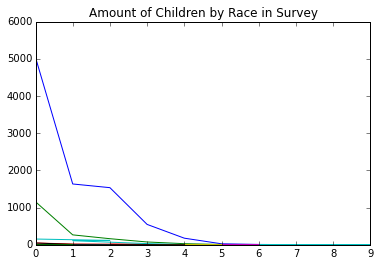

In [194]:
for race, group in data_by_race:    
    group['TRCHILDNUM'].value_counts().plot(kind='line', title='Amount of Children by Race in Survey')

In [201]:
data_by_ethnicity = data.groupby('PEHSPNON')
for ethnicity, group in data_by_ethnicity:
    print(ethnicity)
    print(group['TRCHILDNUM'].value_counts())
    print(len(group['TRCHILDNUM']))

1
0     781
1     322
2     317
3     149
4      54
5       8
6       5
10      1
dtype: int64
1637
2
0    5700
1    1748
2    1542
3     533
4     171
5      31
7      11
6      10
9       2
dtype: int64
9748


##Key

* Green is Non-hispanic
* Blue is Hispanic

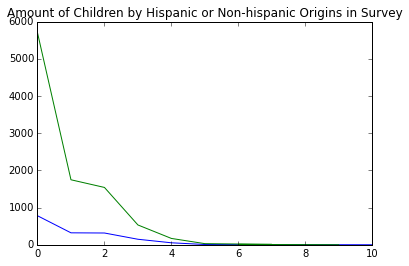

In [205]:
for ethnicity, group in data_by_ethnicity:    
    group['TRCHILDNUM'].value_counts().plot(kind='line', title='Amount of Children by Hispanic or Non-hispanic Origins in Survey')

In [206]:
data_by_working_status = data.groupby('TELFS')
for working_status, group in data_by_working_status:
    print(working_status)
    print(group['TRCHILDNUM'].value_counts())
    print(len(group['TRCHILDNUM']))

1
0     3222
1     1393
2     1323
3      426
4      134
5       16
6        8
7        5
10       1
9        1
dtype: int64
6529
2
0    142
2     66
1     55
3     22
4      5
5      3
6      2
dtype: int64
295
3
0    24
2    10
1     8
3     5
4     1
dtype: int64
48
4
0    249
1    145
2     90
3     39
4     18
5      6
7      1
dtype: int64
548
5
0    2844
1     469
2     370
3     190
4      67
5      14
7       5
6       5
9       1
dtype: int64
3965


##Key

* Blue is employed
* Purple is unemployed
* Other circumstances of unemployment

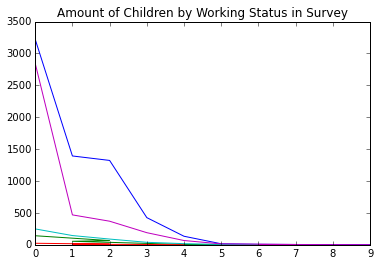

In [207]:
for working_status, group in data_by_working_status:
    group['TRCHILDNUM'].value_counts().plot(kind='line', title='Amount of Children by Working Status in Survey')

In [208]:
data_by_locale = data.groupby('GTMETSTA')
for locale, group in data_by_locale:
    print(locale)
    print(group['TRCHILDNUM'].value_counts())
    print(len(group['TRCHILDNUM']))

1
0     5326
1     1728
2     1567
3      570
4      179
5       33
6       11
7       10
10       1
9        1
dtype: int64
9426
2
0    1109
1     333
2     271
3     103
4      44
5       6
6       3
9       1
7       1
dtype: int64
1871
3
0    46
2    21
3     9
1     9
4     2
6     1
dtype: int64
88


##Key

* Blue is Metropolitan
* Green is Non-Metropolitan

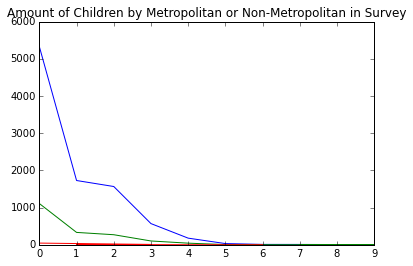

In [209]:
for locale, group in data_by_locale:
    group['TRCHILDNUM'].value_counts().plot(kind='line', title='Amount of Children by Metropolitan or Non-Metropolitan in Survey')

In [210]:
data_by_edu = data.groupby('PEEDUCA')
for edu, group in data_by_edu:
    print(edu)
    print(group['TRCHILDNUM'].value_counts())
    print(len(group['TRCHILDNUM']))

31
0    9
3    4
2    3
1    2
5    1
dtype: int64
19
32
0    39
2    11
1     6
3     3
4     2
6     1
dtype: int64
62
33
0    68
1    23
2    20
3    19
4     7
dtype: int64
137
34
0    146
2     33
3     32
1     31
4      6
5      3
6      2
7      1
dtype: int64
254
35
0    103
1     78
2     71
3     32
4     11
5      3
7      1
dtype: int64
299
36
0    121
1     94
2     56
3     27
4     14
5      2
6      1
dtype: int64
315
37
0    161
1     97
2     61
3     34
4     14
5      4
7      1
dtype: int64
372
38
0    79
1    39
2    31
4     9
3     8
dtype: int64
166
39
0    1923
1     478
2     330
3     131
4      49
5      11
6       4
7       2
9       1
dtype: int64
2929
40
0     1148
1      342
2      282
3       86
4       35
5        6
7        2
6        2
10       1
dtype: int64
1904
41
0    264
1     88
2     73
3     30
4     12
7      2
9      1
dtype: int64
470
42
0    322
2    134
1    134
3     40
4     10
5      1
dtype: int64
641
43
0    1283
2     460
1     4

##Key
* Green is High School Deploma or Equivalency
* Yellow is Bachelors Degree
* Red is Some College but No Degree
* Black is a Masters Degree
* Purple is Associates Degree (Academic)
* Turquoise is Associates Degree (Occupational) 

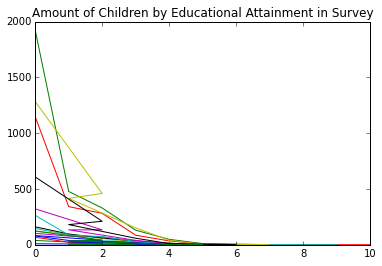

In [211]:
for edu, group in data_by_edu:
    group['TRCHILDNUM'].value_counts().plot(kind='line', title='Amount of Children by Educational Attainment in Survey')

##Conclusion

>This data supports the thesis that the number of children a couple has tends to be decided by a host of factors, including but not limited to, education level, locale, employment status, ethnicity, and racial culture.